In [1]:


import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**Worked Example**
Read Calculus in Context, Chapter 4. This explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Lotka-Voerra Model from page 193 number 7. Explore some of the questions a - f on your own and add some short notes about this model. note: The scaling factor for lynx is 60 (page 194, part c)."plot H and 60L"




Text(0.5, 1.0, 'Hare and Lynx Populations')

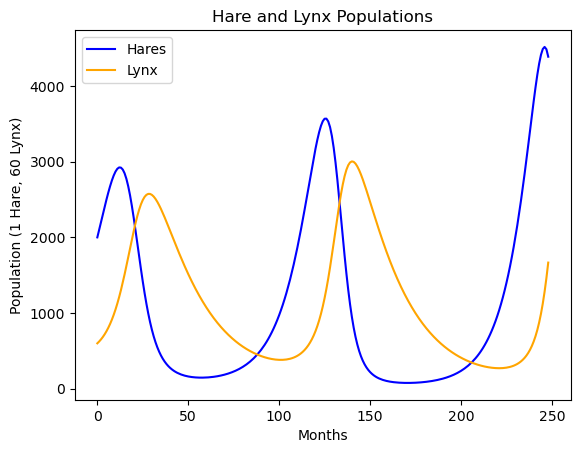

In [2]:
def lynxHare(num_hare, num_lynx, t_final):
    # time variables
    t_initial = 0
    t = t_initial
    # Starting values at the beginning of model for hares and lynx (turns out the plural of lynx is just lynx)
    H = num_hare
    L = num_lynx

    # Hares per month per hare
    a = .1
    # Hares per month per hare-lynx
    b = .005
    # Lynx per month per hare-lynx
    c = .00004
    # Lynx per month per lynx
    d = .04

    # Creating empty arrays to hold values we will plot
    H_graph = []
    L_graph = []

    # Change in time/number of steps
    delta_t = 1
    # Iterating through the number of line segments in our plot (the more lines, the smoother the graph)
    for k in range (1, t_final):
        # Add current values to graph vectors (include Lynx scaling factor of 60)
        H_graph.append(H)
        L_graph.append(60*L)
        # Rate of change in Hare population
        Hprime = a*H - b*H*L
        # Rate of change in Lynx population
        Lprime = c*H*L - d*L
        
        # Actual change in Hare and Lynx populations
        delta_H = Hprime*delta_t
        delta_L = Lprime*delta_t

        #Updating the values of t, H, and L with our delta values
        t = t + delta_t
        H = H + delta_H
        L = L + delta_L

    # return the arrays with values over each step
    return H_graph, L_graph


# Plot the populations
H_line, L_line= lynxHare(2000, 10, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Hare and Lynx Populations')    

The graph above shows part C of number 7 on p. 193-194 of Calculus in Context, beginning with 2,000 hares and 10 lynx.  It includes the basic assumptions of the two species model:

* In the absence of lynx, the hare population grows logistically - we see this in the equation for Hprime, where if the lynx population is 0 then the hare population is aH 
* The population of hares declines in proportion to to H*L - see this in the second half of the equation for Hprime, -bHL.  Both of these assumptions can be seen in the rise and fall of the blue line, which represents the hare population
* In the absence of hares, the lynx die of proportional to the number of lynx - the equation for Lprime shows that if H is 0, then the lynx decline at a rate of dL (and is demonstrated by the declines in the orange line, which occur following the decline of the blue line representing hares)
* The lynx population increases proportionately to the number of encounters between lynx and hares - this can be seen in the first half of Lprime, cHL where c represents lynx per month per hare-lynx.

The hare-lynx units are especially interesting, as they complicate the model to include not only the populations of predators and prey, but also the encounters between the two (R.I.P. hares).

Below are the graphs for parts D and F of number 7, showing both the hare and lynx populations when L=20 and L=50.  Doubling the lynx population from our initial graph condensed it, but changing it 50 did the opposite, spreading out the population peaks and valleys further over the 250 months.

Text(0.5, 1.0, 'Lynx pop. = 20')

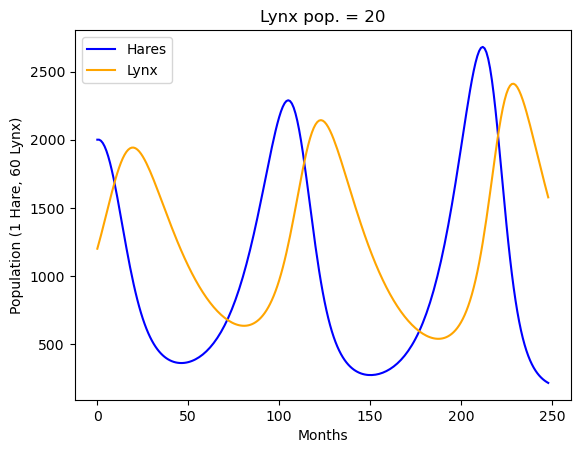

In [3]:
H_line, L_line= lynxHare(2000, 20, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Lynx pop. = 20') 

Text(0.5, 1.0, 'Lynx pop = 50')

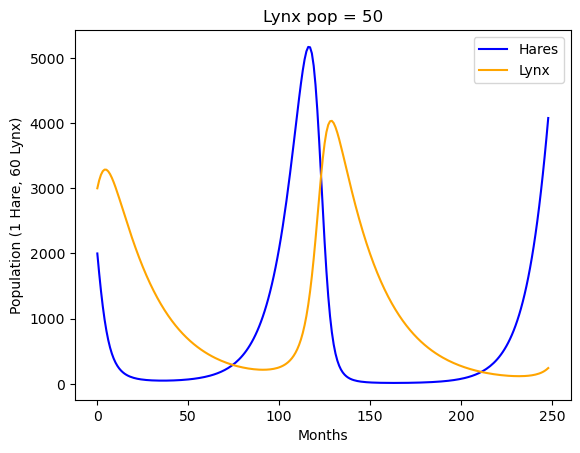

In [4]:
H_line, L_line= lynxHare(2000, 50, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Lynx pop = 50') 

**Activity One:**
Do all parts of the May Model, 4.1 question 6. 


## 6 a) ##

$$ D(x) = \frac{c*x}{x+d} $$ is a reasonable model because as the amount of rabbits eaten can never exceed x or c. If you remove d from the equation and x and c are equal, the x's cancel out and all that is left is c. As d increases, it takes more rabbits before the fox is eating at it's saturation value. I thought of this as the inverse of the encounter rate. As encounters increase, the value of d decreases meaning it's easiwer for the fox to reach it's saturation. In Piazza discussions this was taken as "handling time," or the amount of time it takes the fox to digest. It would make sense and if this is true then at some point the saturation value would never be reached because the fox wouldn't be able to "process" rabbits fast enough. 

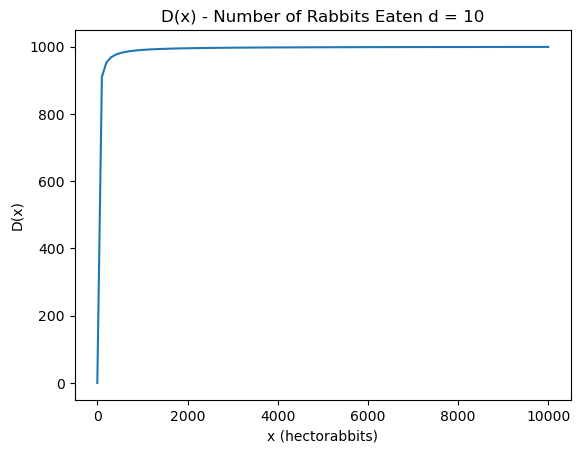

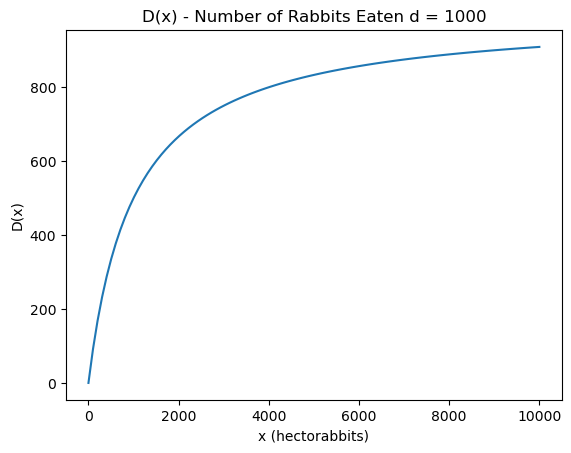

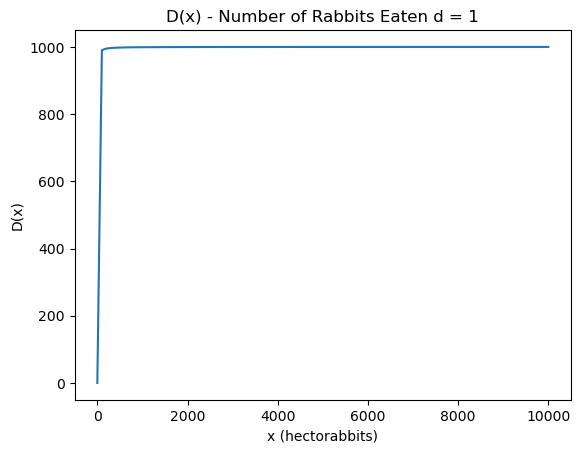

In [5]:
def D(c,d,x):
    return (c*x)/(x+d) #function for D(x) where x is rabbits/100

def graph_D(c,d): #c is saturation value 
    
    xvals = np.linspace(0,10000,100)
    yvals = D(c,d,xvals)
    
    plt.plot(xvals,yvals)
    plt.title("D(x) - Number of Rabbits Eaten d = " + str(d))
    plt.xlabel("x (hectorabbits)")
    plt.ylabel("D(x)")
    plt.show()
    
graph_D(1000, 10)
graph_D(1000, 1000)  
graph_D(1000,1)

## 6 b) ##

$$ x' = a*x*(1- \frac{x}{b}) -\frac{c*x*y}{x+d} $$ 
incorportes the first assumption that in the absence of foxes the rabbits grow logistically because it uses the logistics equation from page 183 as the first term of the equation and the second term goes to zero if the number of foxes (y) equals zero. The second assumption about the number of rabbits a fox can eat going from zero to some saturation value is given by the second part of the equation: D(x) from part (a) multipled by the number of foxes y.

The second equation: $$ y' = e*y(1-/frac{y}{f*x}) $$ manages May's third assumption. It gives the logistics equation but instead of a fixed saturation value it uses a coefficient multiplied by the number of rabbits (x). 

Therefore all three of May's assumptions are accounted for by these equations.

## 6 c) ##

In this case the total number of rabbits decreases rapidly because it is over the carrying capacity of the system. The number of foxes initially increases with the high number of rabbits then starts to decrease. With the decrease in predators the number of rabbits increase, which in turn increases the number of rabbits. The system continues to cycle from there. 

Text(0.5, 1.0, 'Rabbit and Fox Populations')

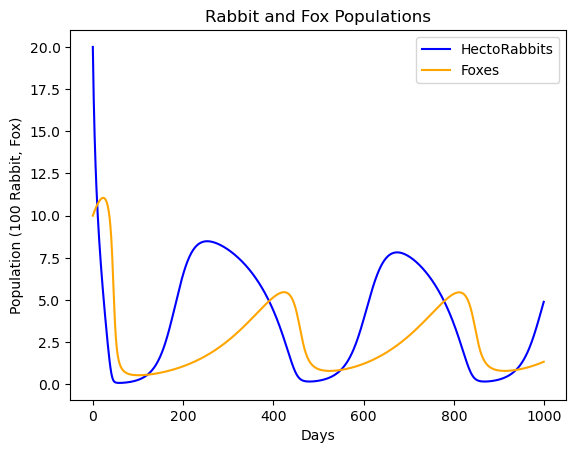

In [6]:
def foxRabbit(a,b,c,d,e,f,x, y, t_final, steps):   #x = number of rabbits
                                        #y = number of foxes 
    # time variables
    t_initial = 0
    t = t_initial
    delta_t = (t_final-t_initial)/steps

    x = x/100 #convert rabits to hectorabbits

    # Creating empty arrays to hold values we will plot
    x_graph = [x]
    y_graph = [y]

    # Change in time/number of steps
    #delta_t = 1
    # Iterating through the number of line segments in our plot (the more lines, the smoother the graph)
    for k in range (1, t_final):

        # Rate of change in rabbit population
        xprime = (a*x*(1-(x/b))) - ((c*x*y)/(x+d))
        # Rate of change in fox population
        yprime = e*y*(1-(y/(f*x)))
        
        # Actual change in Hare and Lynx populations
        delta_x = xprime*delta_t
        delta_y = yprime*delta_t

        #Updating the values of t, H, and L with our delta values
        t = t + delta_t
        x = x + delta_x
        y = y + delta_y
            # Add current values to graph vectors (include Rabbits divided by 100 - hectorabbits)
        x_graph.append(x)
        y_graph.append(y)

    # return the arrays with values over each step
    return x_graph, y_graph
    

a = .6
b = 10
c = 0.5
d = 1
e = 0.1   
f = 2


# Plot the populations
x_line, y_line= foxRabbit(a,b,c,d,e,f,2000, 10, 1000, 10000)
plt.plot(x_line, color='blue', label='HectoRabbits')
plt.plot(y_line, color='orange', label='Foxes')
plt.legend(['HectoRabbits', 'Foxes'])
plt.xlabel('Days')
plt.ylabel('Population (100 Rabbit, Fox)')
plt.title('Rabbit and Fox Populations')    

## 6 d) ##

Increasing the fox population to start increased the initial decline and gave a larger fox population to decline to start. Changing to 1000/10 did not have much change even though the graph looks different because the graph is compressed. Other than small initial changes, it appears changing the starting values did not much effect the long term cycling of the populations. 

<function matplotlib.pyplot.show(close=None, block=None)>

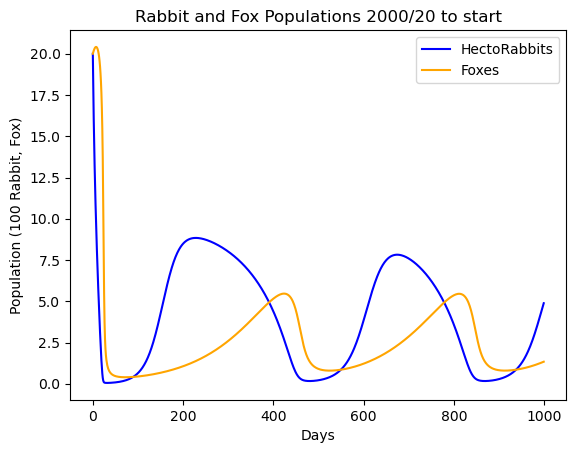

In [7]:
x_line, y_line= foxRabbit(a,b,c,d,e,f,2000, 20, 1000, 10000)
plt.plot(x_line, color='blue', label='HectoRabbits')
plt.plot(y_line, color='orange', label='Foxes')
plt.legend(['HectoRabbits', 'Foxes'])
plt.xlabel('Days')
plt.ylabel('Population (100 Rabbit, Fox)')
plt.title('Rabbit and Fox Populations 2000/20 to start')
plt.show



Text(0.5, 1.0, 'Rabbit and Fox Populations 1000/10')

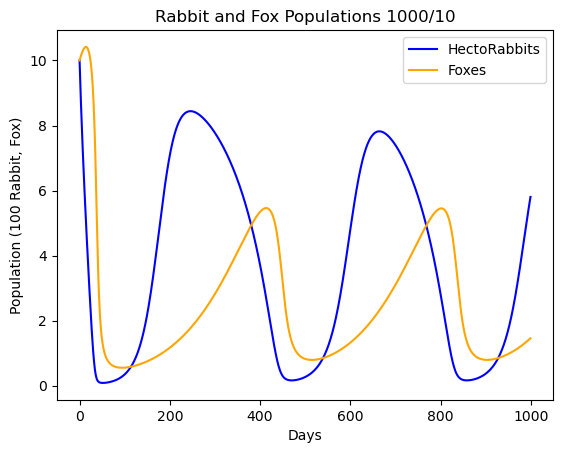

In [8]:
x_line, y_line= foxRabbit(a,b,c,d,e,f,1000, 10, 1000, 10000)
plt.plot(x_line, color='blue', label='HectoRabbits')
plt.plot(y_line, color='orange', label='Foxes')
plt.legend(['HectoRabbits', 'Foxes'])
plt.xlabel('Days')
plt.ylabel('Population (100 Rabbit, Fox)')
plt.title('Rabbit and Fox Populations 1000/10')  




Text(0.5, 1.0, 'Rabbit and Fox Populations 1000/20')

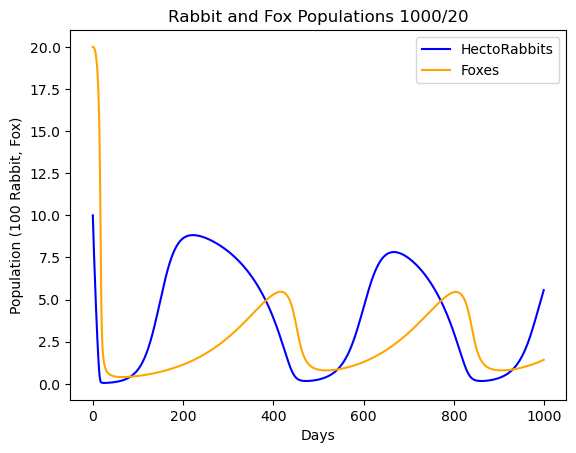

In [9]:
x_line, y_line= foxRabbit(a,b,c,d,e,f,1000, 20, 1000, 10000)
plt.plot(x_line, color='blue', label='HectoRabbits')
plt.plot(y_line, color='orange', label='Foxes')
plt.legend(['HectoRabbits', 'Foxes'])
plt.xlabel('Days')
plt.ylabel('Population (100 Rabbit, Fox)')
plt.title('Rabbit and Fox Populations 1000/20')  

## 6 e) ##
As the value of c is decreased from .3 to .25 the cyclic oscillations are decreased and the values begin to stabilize as depicted by the lower amplitude of later waves. I reran the code below and the first noticible decrease occurs around .2643. I'm sure a longer time frame of comparing maximum values of each wave would help refine this more. 

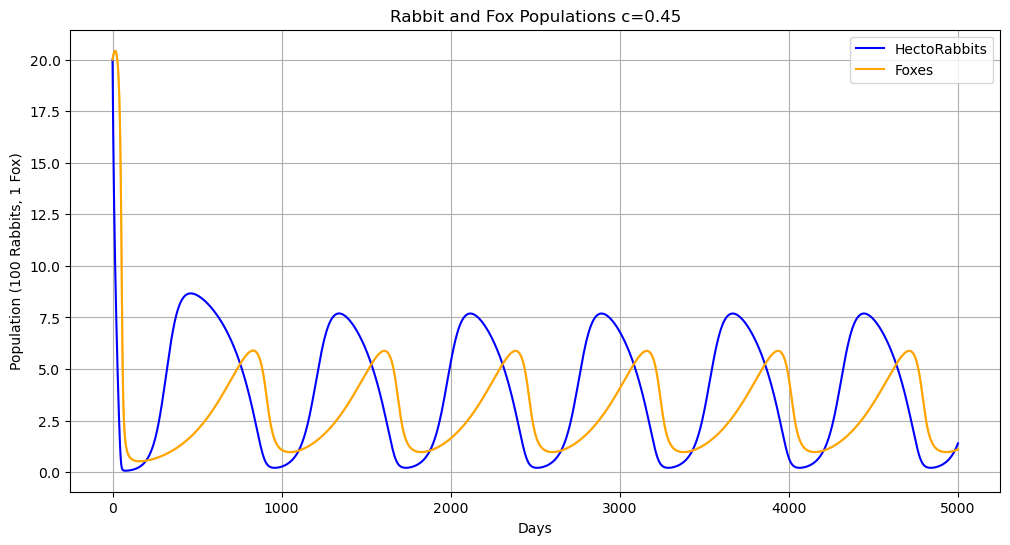

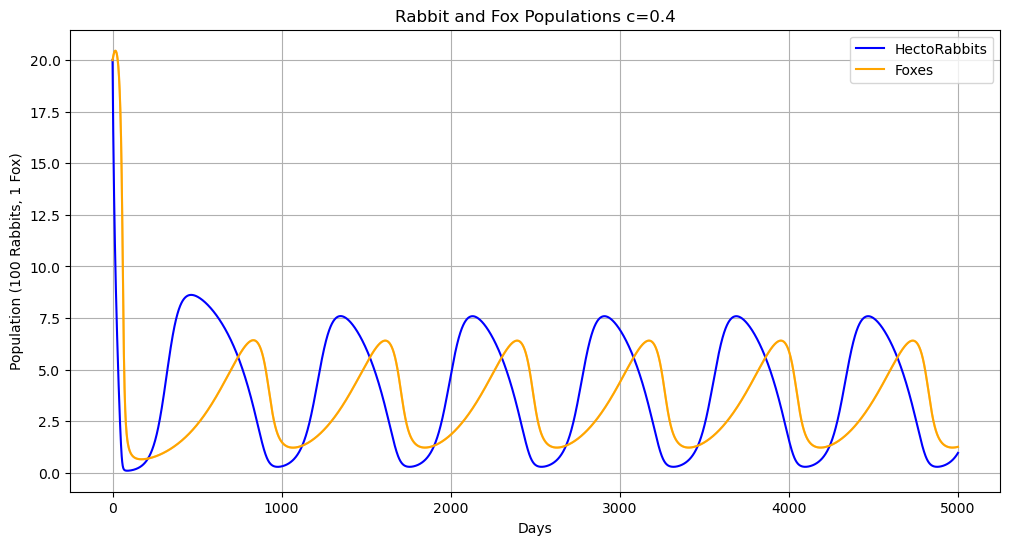

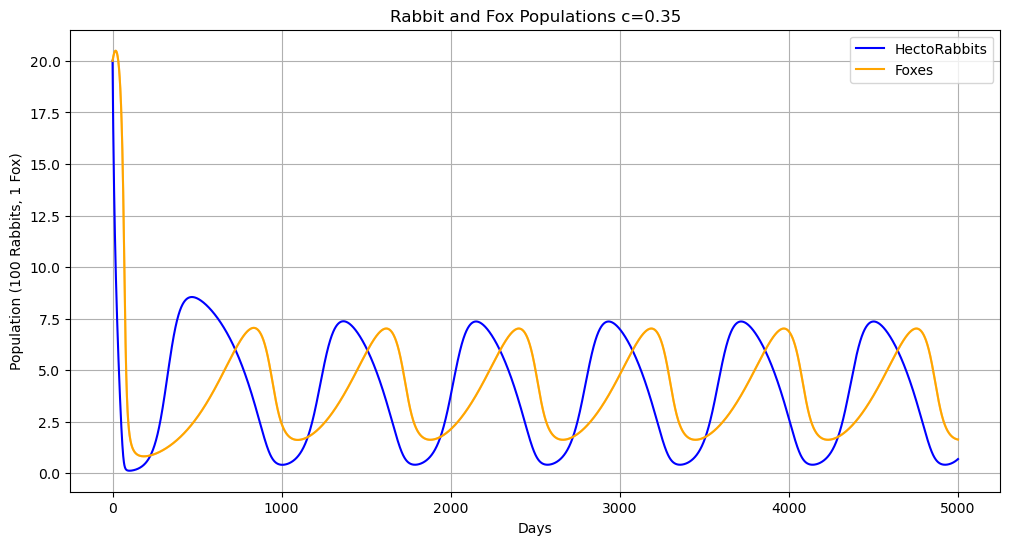

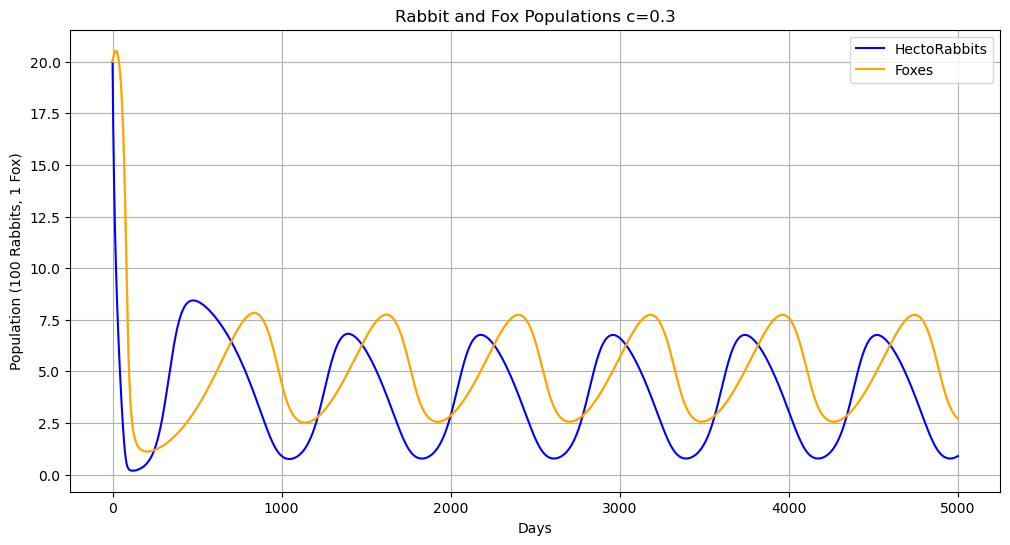

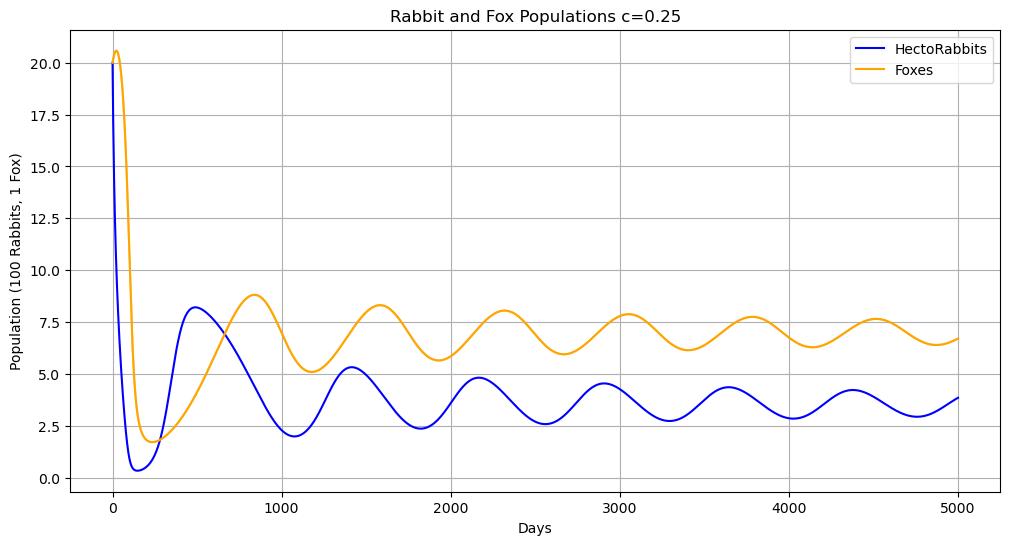

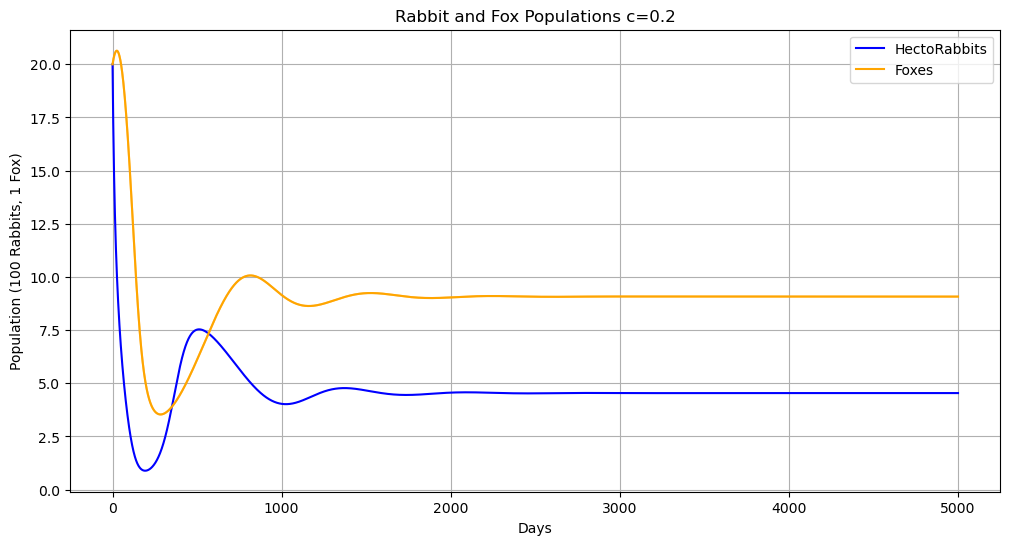

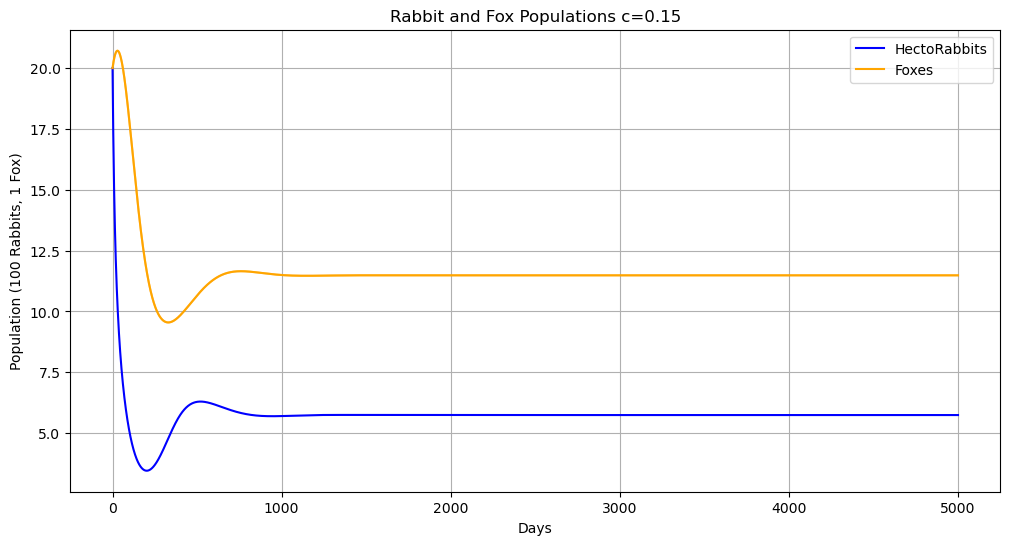

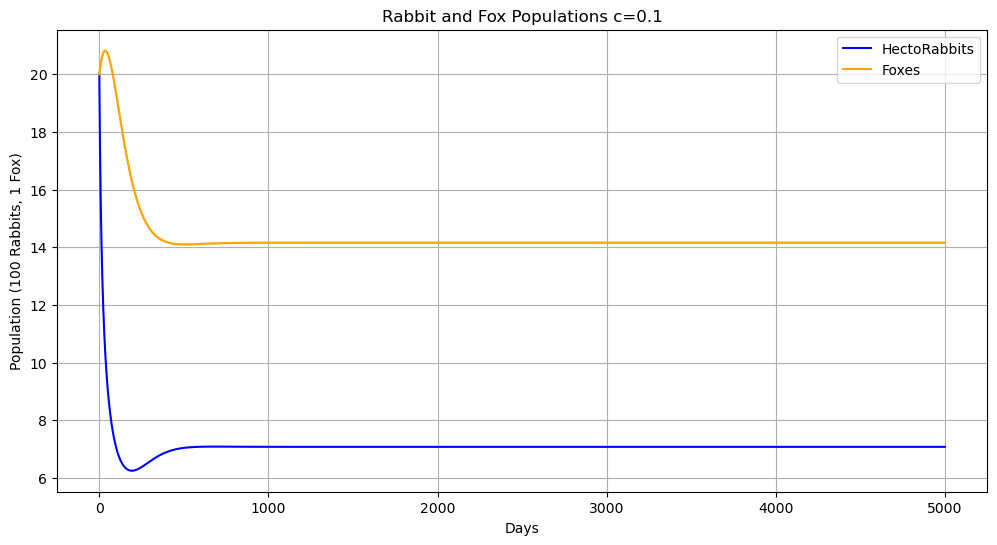

In [10]:
# Range of 'c' values
cvals = np.linspace(0.45, 0.1, 8)

# Set up the plot


# Loop through each value of 'c'
for c in cvals:
    x_line, y_line = foxRabbit(a, b, c, d, e, f, 2000, 20, 5000, 100000)
    plt.figure(figsize=(12, 6))
    # Plot Rabbit and Fox populations
    plt.plot(x_line, color='blue', label='HectoRabbits')
    plt.plot(y_line, color='orange', label='Foxes')
    
    # Always append the current fox line label
    plt.plot(y_line, color='orange', alpha=0.5)  # Lighten fox lines for clarity
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Population (100 Rabbits, 1 Fox)')
    plt.title('Rabbit and Fox Populations c=' + str(round(c,2)))
    plt.grid()
    plt.show()


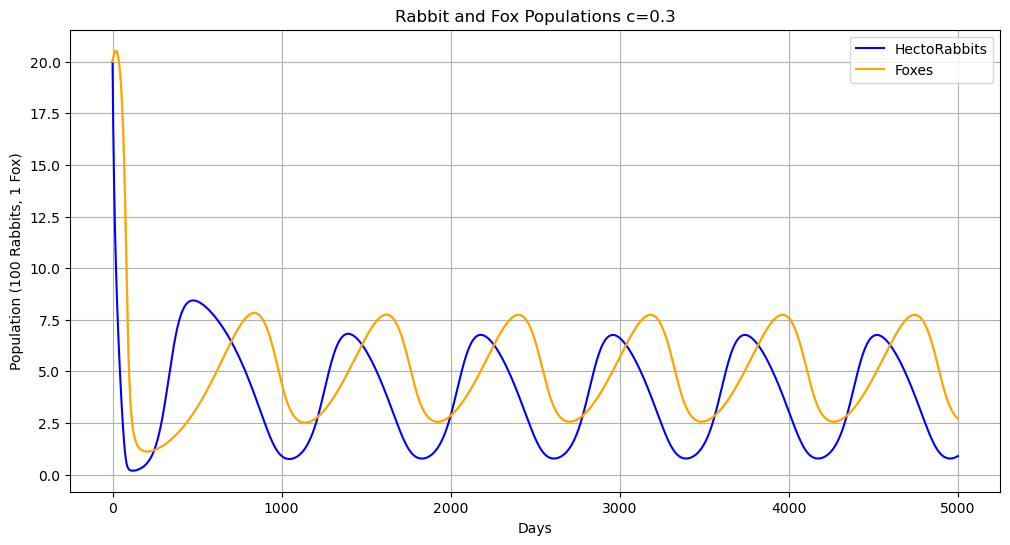

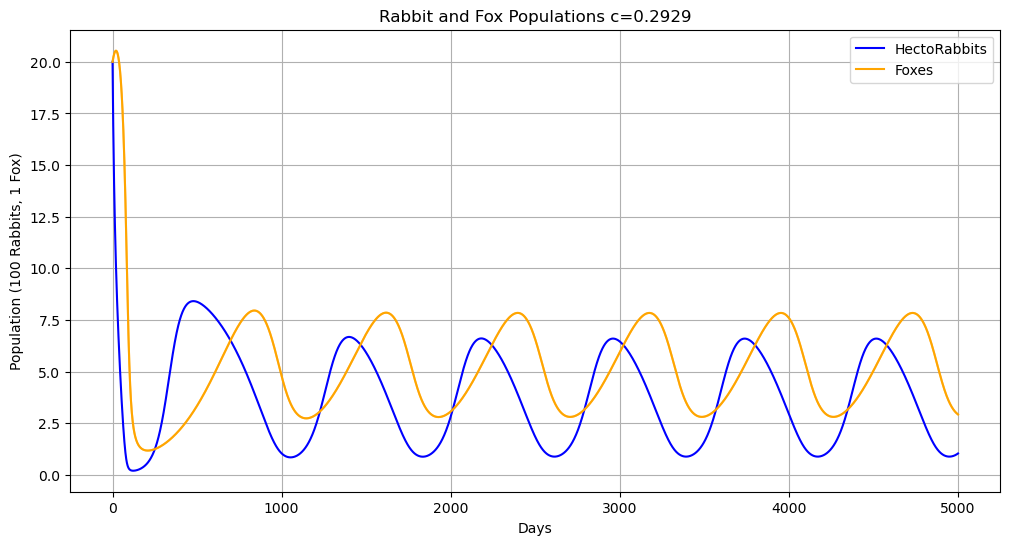

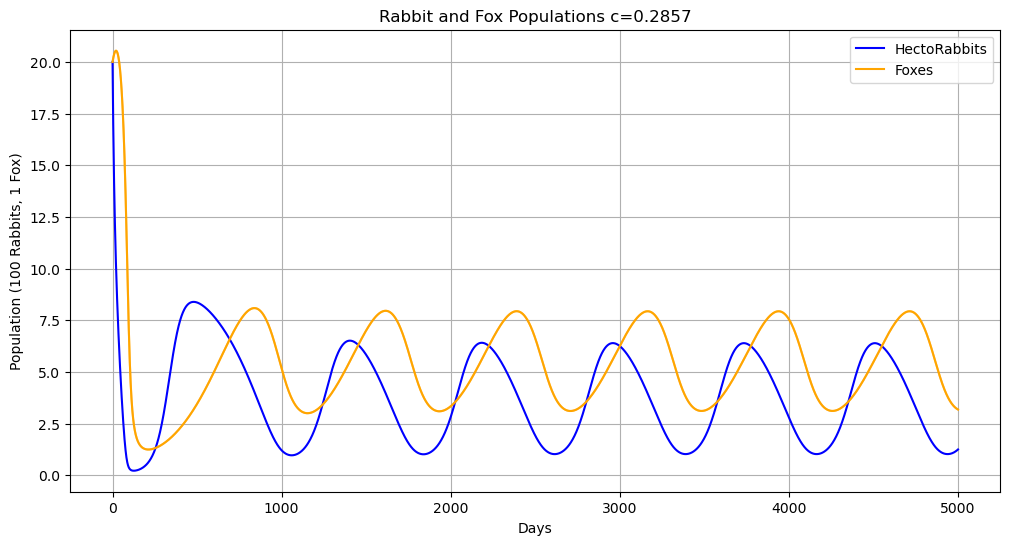

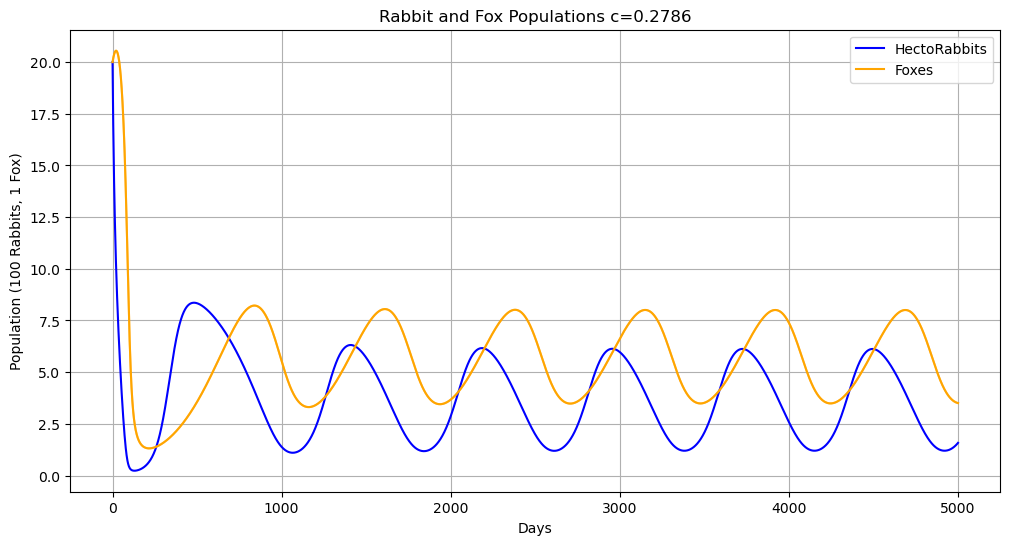

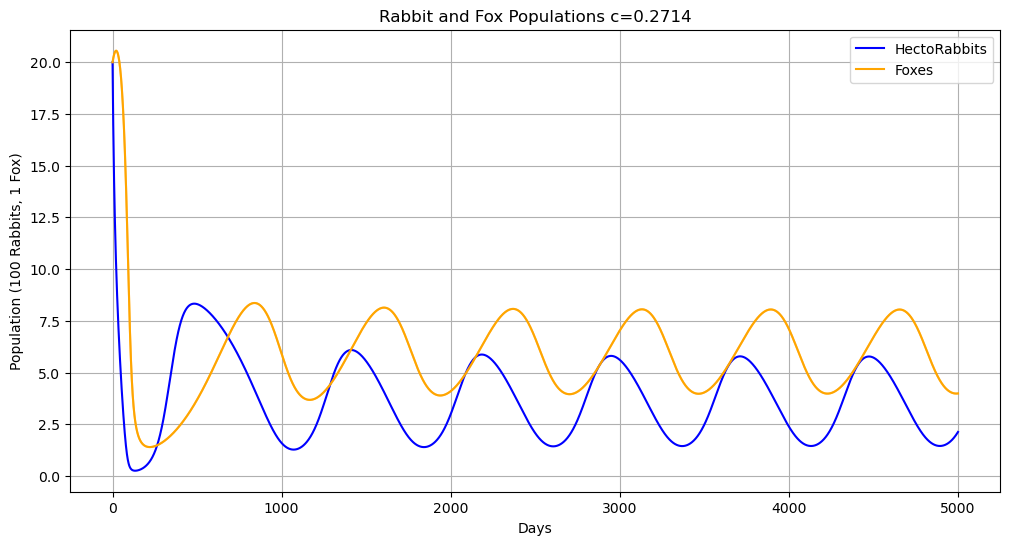

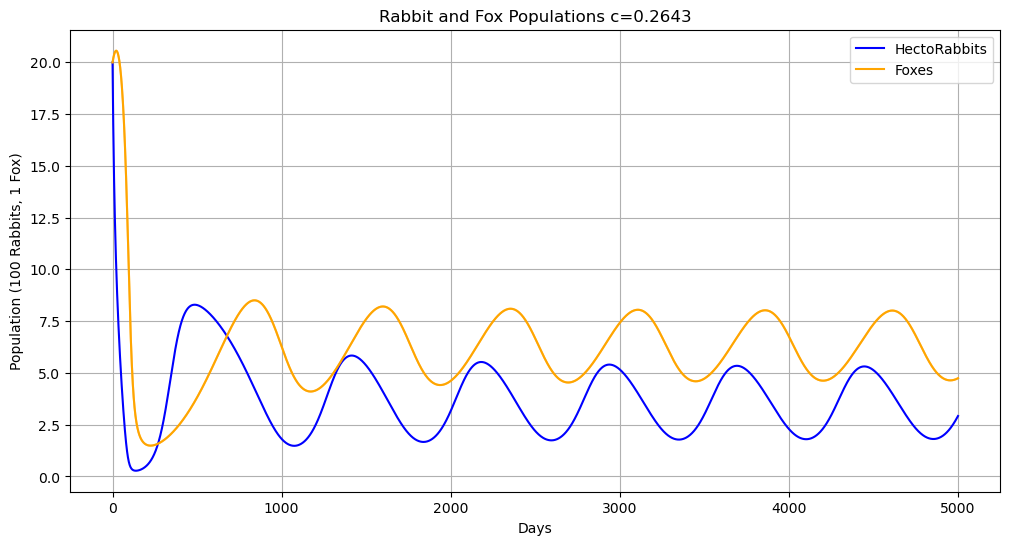

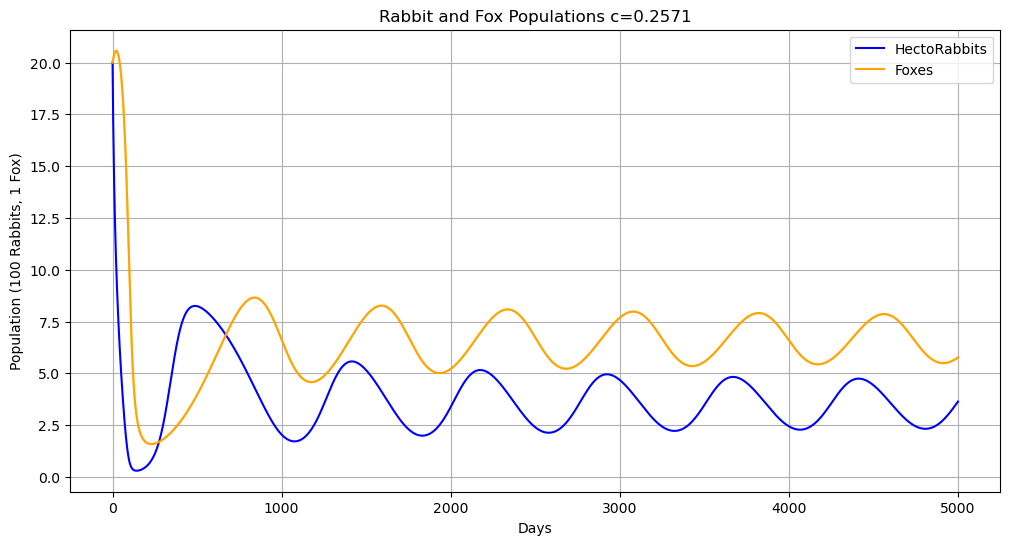

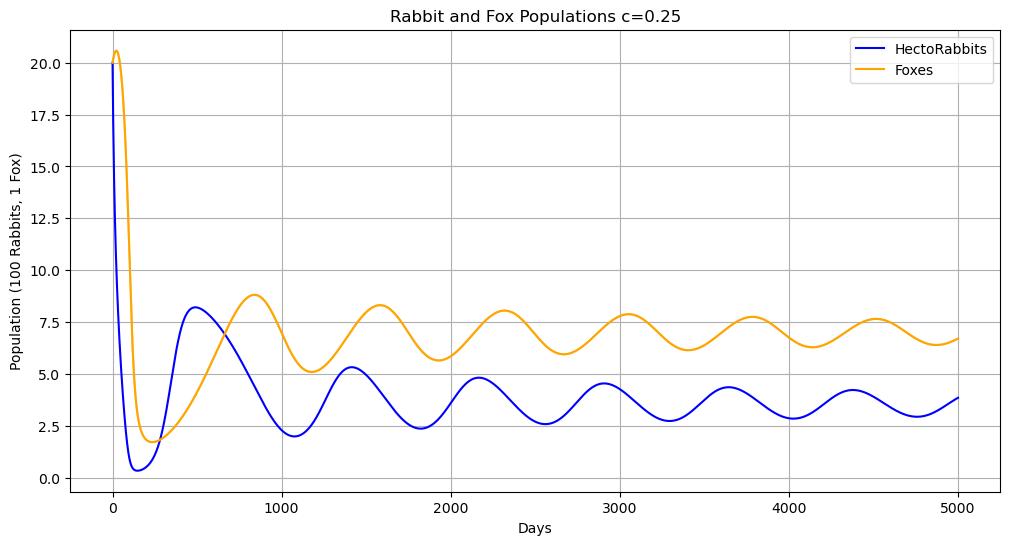

In [11]:
cvals = np.linspace(0.3, 0.25, 8)

# Set up the plot


# Loop through each value of 'c'
for c in cvals:
    x_line, y_line = foxRabbit(a, b, c, d, e, f, 2000, 20, 5000, 100000)
    plt.figure(figsize=(12, 6))
    # Plot Rabbit and Fox populations
    plt.plot(x_line, color='blue', label='HectoRabbits')
    plt.plot(y_line, color='orange', label='Foxes')
    
    # Always append the current fox line label
    plt.plot(y_line, color='orange', alpha=0.5)  # Lighten fox lines for clarity
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Population (100 Rabbits, 1 Fox)')
    plt.title('Rabbit and Fox Populations c=' + str(round(c,4)))
    plt.grid()
    plt.show()


**Activity Two:**
Do all parts of 4.1  #8, #9, #10, #11 Fermentation. It's great to discover these equations on your own,however, please check with me and Piazza to make sure you've got them right.

## 8 a ## 
Using the logistics equation from pg 183 for rabits of $$ R' = k*R*(\frac{1-R}{b}) $$ with k being the natural growth rate and b the carrying capacity of the system. Substituting for Yeast, we arrive at the equation $$ Y'(t) = .2*Y*(1-\frac{Y}{10}) $$

## 8 b ## 
Graphical solution of Y(t)

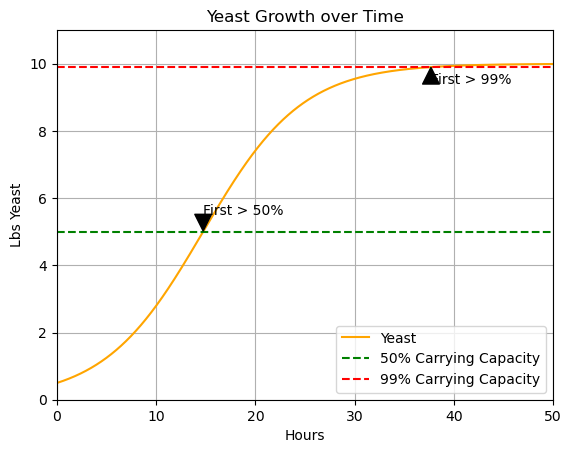

First exceeding 50% carrying capacity: (14.730000000000903, 5.001826689005374)
First exceeding 99% carrying capacity: (37.69500000000083, 9.900022325701235)


In [12]:
def yeast(k, b, Y_initial, t_final, steps):   
    
    # time variables
    t_initial = 0
    t = t_initial
    delta_t = (t_final-t_initial)/steps
    # initiate the values
    Y = Y_initial 
    
    #initiate 
    fifty = (0,0)
    within_one = (0,0)

    # Creating empty arrays to hold values we will plot

    Y_graph = [Y_initial]
    t_graph = [t]

    # Change in time/number of steps
    #delta_t = 1
    # Iterating through the number of line segments in our plot (the more lines, the smoother the graph)
    while (t < t_final):

        # Rate of change in fox population
        Yprime = k*Y*(1 - Y/b)
        
        # Actual change in Yeast population
        #delta_x = xprime*delta_t
        delta_Y = Yprime*delta_t

        #Updating the values of Y
        t = t + delta_t
        #x = x + delta_x
        Y = Y + delta_Y
        # Add current values to graph vectors
        if ((Y > (b/2.0)) and (fifty == (0,0))):
            fifty = (t,Y) #store time when it first exceeds 50%
        if ((Y > b*.99) and (within_one == (0,0))):
            within_one = (t, Y) #store time when it first exceeds 99%

        Y_graph.append(Y)
        t_graph.append(t)

    # return the arrays with values over each step
    return t_graph, Y_graph, fifty, within_one
    

k = .2 #natural groath rate of yeast in lbs of yeast per hour, per pound of yeast
b = 10 #carrying capacity of the grape juice
Y_initial = .5 #initial yeast amount added 
time_values, yeast_values, mid, ninety = yeast(k, b, Y_initial, 50, 10000) #calculate the values 


plt.plot(time_values, yeast_values, color='orange', label='Yeast')
plt.axhline(y=b/2, color='green', linestyle='--', label='50% Carrying Capacity')
plt.axhline(y=b*0.99, color='red', linestyle='--', label='99% Carrying Capacity')

# Annotate mid and 99 percent points
if mid != (0, 0):
    plt.annotate('First > 50%', xy=mid, xytext=(mid[0], mid[1]+0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
if ninety != (0, 0):
    plt.annotate('First > 99%', xy=ninety, xytext=(ninety[0], ninety[1]-0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
plt.xlabel('Hours')
plt.ylabel('Lbs Yeast')
plt.title('Yeast Growth over Time')        
plt.legend()
plt.xlim(0, 50)  # Set x-axis limits to match the time span
plt.ylim(0, b + 1)  # Set y-axis limits
plt.grid(True)
plt.show()

print("First exceeding 50% carrying capacity:", mid)
print("First exceeding 99% carrying capacity:", ninety)

## 9 c ##  
Plots the Yeast groath over time with one half the natural growth rate of the original, then plot them against each other. 

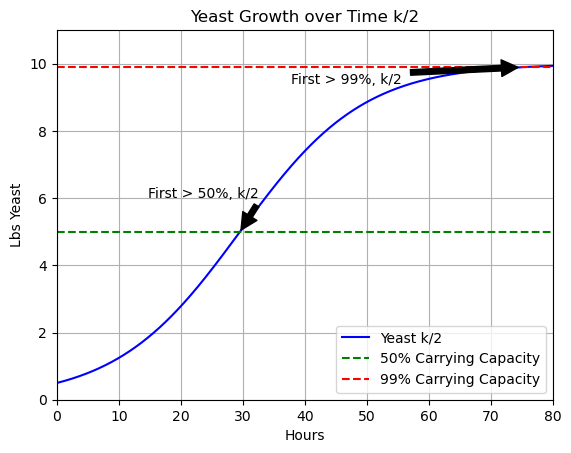

First exceeding 50% carrying capacity k/2: (29.519999999999722, 5.002298492830718)
First exceeding 99% carrying capacity: k/2 (75.35999999999875, 9.900270386979187)


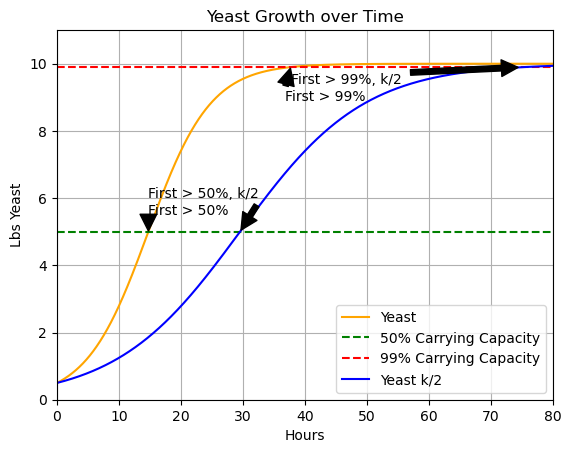

First exceeding 50% carrying capacity: (14.735999999999263, 5.003581220051907)
First exceeding 50% carrying capacity k/2: (29.519999999999722, 5.002298492830718)
First exceeding 99% carrying capacity: (37.695999999999266, 9.90008874770083)
First exceeding 99% carrying capacity: k/2 (75.35999999999875, 9.900270386979187)


In [13]:
time_values2, yeast_values2, mid2, ninety2 = yeast(k/2, b, Y_initial, 80, 1000)

plt.plot(time_values2, yeast_values2, color='blue', label='Yeast k/2')
plt.axhline(y=b/2, color='green', linestyle='--', label='50% Carrying Capacity')
plt.axhline(y=b*0.99, color='red', linestyle='--', label='99% Carrying Capacity')

# Annotate mid and 99 percent points
if mid2 != (0, 0):
    plt.annotate('First > 50%, k/2', xy=mid2, xytext=(mid[0], mid[1]+1),
                 arrowprops=dict(facecolor='black', shrink=0.05))
if ninety2 != (0, 0):
    plt.annotate('First > 99%, k/2', xy=ninety2, xytext=(ninety[0], ninety[1]-0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
plt.xlabel('Hours')
plt.ylabel('Lbs Yeast')
plt.title('Yeast Growth over Time k/2')        
plt.legend()
plt.xlim(0, 80)  # Set x-axis limits to match the time span
plt.ylim(0, b + 1)  # Set y-axis limits
plt.grid(True)
plt.show()

print("First exceeding 50% carrying capacity k/2:", mid2)
print("First exceeding 99% carrying capacity: k/2", ninety2)

# Now we plot both
time_values, yeast_values, mid, ninety = yeast(k, b, Y_initial, 80, 10000) #calculate the values to match t of 80

plt.plot(time_values, yeast_values, color='orange', label='Yeast')
plt.axhline(y=b/2, color='green', linestyle='--', label='50% Carrying Capacity')
plt.axhline(y=b*0.99, color='red', linestyle='--', label='99% Carrying Capacity')

# Annotate mid and 99 percent points
if mid != (0, 0):
    plt.annotate('First > 50%', xy=mid, xytext=(mid[0], mid[1]+0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
if ninety != (0, 0):
    plt.annotate('First > 99%', xy=ninety, xytext=(ninety[0]-1, ninety[1]-1),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
plt.plot(time_values2, yeast_values2, color='blue', label='Yeast k/2')
# plt.axhline(y=b/2, color='green', linestyle='--', label='50% Carrying Capacity')
# plt.axhline(y=b*0.99, color='red', linestyle='--', label='99% Carrying Capacity')

# Annotate mid and 99 percent points
if mid2 != (0, 0):
    plt.annotate('First > 50%, k/2', xy=mid2, xytext=(mid[0], mid[1]+1),
                 arrowprops=dict(facecolor='black', shrink=0.05))
if ninety2 != (0, 0):
    plt.annotate('First > 99%, k/2', xy=ninety2, xytext=(ninety[0], ninety[1]-0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
plt.xlabel('Hours')
plt.ylabel('Lbs Yeast')
plt.title('Yeast Growth over Time')        
plt.legend()
plt.xlim(0, 80)  # Set x-axis limits to match the time span
plt.ylim(0, b + 1)  # Set y-axis limits
plt.grid(True)
plt.show()

print("First exceeding 50% carrying capacity:", mid)
print("First exceeding 50% carrying capacity k/2:", mid2)
print("First exceeding 99% carrying capacity:", ninety)
print("First exceeding 99% carrying capacity: k/2", ninety2)

## 9 a ## 
$$ A'(t) = .05 * Y $$

## 9 b ## 
Give the original: $$ Y'(t) = .2 * Y * (1- \frac{Y}{10}) $$ the equation needs to be modified to remove the amount of yeast killed by the alcohol at a rate proportional to both yeast and alcohol so the new equation should be $$ Y'(t) = .2 * Y * (1 - \frac{Y}{10}) - .1 * Y * A $$

## 9 c ##
In the plot below we can see the fermentation does end after 65.8 hours with 3.34 lbs of alcohol produced. The yeast amount never gets close to the carrying capacity of the system, reaching a peak at 15.8 hours of 2.93 lbs. 

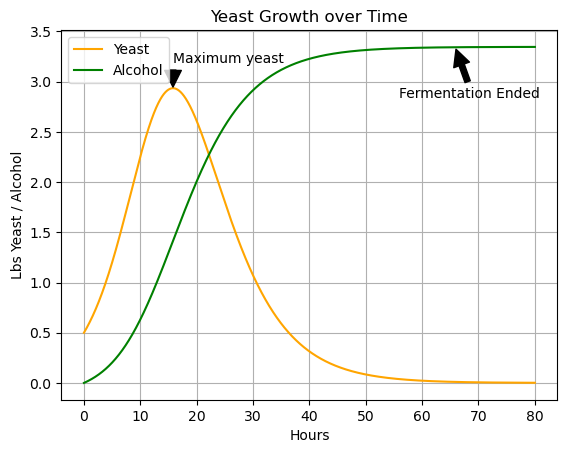

Maximum Yeast time and amount: (15.799999999999146, 2.934799849117944)
Firmentation ended time and alcohol amount: (65.888000000007, 3.342811240576266)


In [14]:
def yeastAlcohol(k, b, p, tl, Y_initial, A_initial, t_final, steps):   
    
    # time variables
    t_initial = 0
    t = t_initial
    delta_t = (t_final-t_initial)/steps
    # initiate the values
    Y = Y_initial 
    A = A_initial
    
    #initiate 
    fermentation_end_alcohol = (0,0)
    max_yeast = (t, Y)

    # Creating empty arrays to hold values we will plot
    
    Y_graph = [Y_initial]
    A_graph = [A_initial]
    t_graph = [t]

    # Change in time/number of steps
    #delta_t = 1
    # Iterating through the number of line segments in our plot (the more lines, the smoother the graph)
    while (t < t_final):

        # Rate of change in fox population
        Yprime = k*Y*(1 - Y/b) - (tl * Y * A)
        Aprime = p*Y
        
        # Actual change in Yeast population
       
        delta_Y = Yprime*delta_t
        delta_A = Aprime*delta_t

        #Updating the values of Y
        t = t + delta_t
        Y = Y + delta_Y
        A = A + delta_A
        
        if (Y > max_yeast[1]):
            max_yeast = (t, Y)
        
        
        if ((Y <= .01 and (fermentation_end_alcohol == (0,0)))):
            fermentation_end_alcohol = (t,A) #store time when fermentation stopped and amount of alcohol 
            
        # Add current values to graph vectors
        Y_graph.append(Y)
        t_graph.append(t)
        A_graph.append(A)

    # return the arrays with values over each step
    return t_graph, Y_graph, A_graph, fermentation_end_alcohol, max_yeast
    

k = .2 #natural groath rate of yeast in lbs of yeast per hour, per pound of yeast
b = 10 #carrying capacity of the grape juice
p = .05 #alcohol production
tl = .1 #toxicity level 

Y_initial = .5 #initial yeast amount added 
A_initial = 0 #no alcohol present to start 
time_values, yeast_values, alcohol_values, fermentation_end_alcohol, max_yeast = yeastAlcohol(k, b, p, tl, Y_initial, A_initial, 80, 10000) #calculate the values 


plt.plot(time_values, yeast_values, color='orange', label='Yeast')
plt.plot(time_values, alcohol_values, color='green', label='Alcohol')


# Annotate max yeast and fermentation end
if fermentation_end_alcohol != (0, 0):
    plt.annotate('Fermentation Ended', xy=fermentation_end_alcohol, xytext=(fermentation_end_alcohol[0]-10, fermentation_end_alcohol[1]-0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
if max_yeast != (0, 0):
    plt.annotate('Maximum yeast', xy=max_yeast, xytext=(max_yeast[0], max_yeast[1]+0.25),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Hours')
plt.ylabel('Lbs Yeast / Alcohol')
plt.title('Yeast Growth over Time')        
plt.legend()
# plt.xlim(0, 80)  # Set x-axis limits to match the time span
# plt.ylim(0, b + 1)  # Set y-axis limits
plt.grid(True)
plt.show()

print("Maximum Yeast time and amount:", max_yeast)
print("Firmentation ended time and alcohol amount:", fermentation_end_alcohol)



## 10 ##

Increased alcohol production from .05 to .25 and decreased toxicity from .1 to .02. The maximum yeast doesn't change and fermentation ends about the same time but the amount of alcohol present increases nearly five times. 

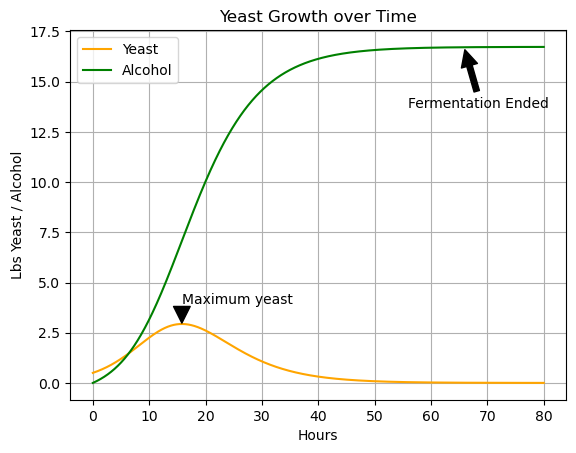

Maximum Yeast time and amount: (15.799999999999146, 2.9347998491179426)
Firmentation ended time and alcohol amount: (65.888000000007, 16.71405620288133)


In [15]:
k = .2 #natural groath rate of yeast in lbs of yeast per hour, per pound of yeast
b = 10 #carrying capacity of the grape juice
p = .25 #alcohol production
tl = .02 #toxicity level 

Y_initial = .5 #initial yeast amount added 
A_initial = 0 #no alcohol present to start 
time_values, yeast_values, alcohol_values, fermentation_end_alcohol, max_yeast = yeastAlcohol(k, b, p, tl, Y_initial, A_initial, 80, 10000) #calculate the values 


plt.plot(time_values, yeast_values, color='orange', label='Yeast')
plt.plot(time_values, alcohol_values, color='green', label='Alcohol')


# Annotate max yeast and fermentation end
if fermentation_end_alcohol != (0, 0):
    plt.annotate('Fermentation Ended', xy=fermentation_end_alcohol, xytext=(fermentation_end_alcohol[0]-10, fermentation_end_alcohol[1]-3),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
if max_yeast != (0, 0):
    plt.annotate('Maximum yeast', xy=max_yeast, xytext=(max_yeast[0], max_yeast[1]+1),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Hours')
plt.ylabel('Lbs Yeast / Alcohol')
plt.title('Yeast Growth over Time')        
plt.legend()
# plt.xlim(0, 80)  # Set x-axis limits to match the time span
# plt.ylim(0, b + 1)  # Set y-axis limits
plt.grid(True)
plt.show()

print("Maximum Yeast time and amount:", max_yeast)
print("Firmentation ended time and alcohol amount:", fermentation_end_alcohol)

## 11 a ##
The amount of sugar being consumed is given by the equation $$ S'(t) = c*Y $$ with c being .15 lbs of sugar per hour, per lb of yeast.

## 11 b ##

If the carrying capacity of S lbs of sugar is .4 * S lbs of yeast, then to reach 10 lbs of yeast carrying capacity we need 25 lbs of sugar. To maintain a carrying capacity of 1 lbs yeast we need 2.5 lbs of sugar. The new logistics equation for Yeast is $$ Y'(t) = k*Y*(1 - \frac{Y}{b*S})-tl*Y*A $$ tl is the toxicity level and b is the carrying capacity of S lbs of Sugar.

## 11 c ## 

The effect of .5 lbs of yeast in a vat of grape juice is given by the model below. The rate of yeast production is slightly lower because the amount of sugar decreases over time. Because the toxicity eventually eliminates the Yeast, not all of the sugar is depleated and although the amount of yeast approaches zero. The end fermentation ends at 68.48 hours with 3.21 lbs of alcohol and 15.36 lbs of sugar remaining. 

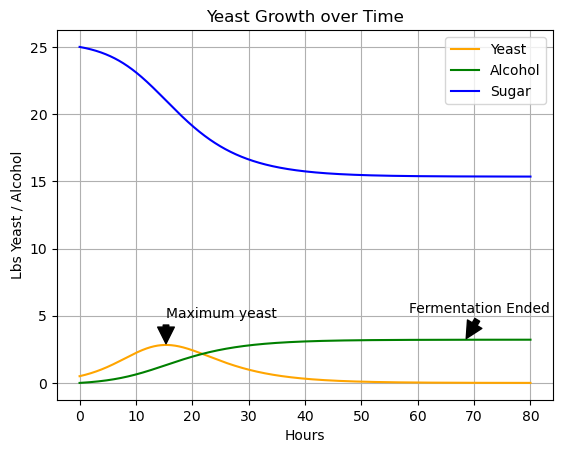

Maximum Yeast time and amount: (15.335999999999197, 2.825658099345474)
Firmentation ended time and alcohol amount: (68.48000000000556, 3.2124952158206623)
Sugar end amount: 15.362514352538076


In [16]:
def yeastAlcoholSugar(k, b, p, tl, c, Y_initial, A_initial, S_initial, t_final, steps):   
    
    # time variables
    t_initial = 0
    t = t_initial
    delta_t = (t_final-t_initial)/steps
    # initiate the values
    Y = Y_initial 
    A = A_initial
    S = S_initial
    
    #initiate 
    fermentation_end_alcohol = (0,0)
    max_yeast = (t, Y)

    # Creating empty arrays to hold values we will plot
    
    Y_graph = [Y]
    A_graph = [A]
    S_graph = [S]
    t_graph = [t]

    # Change in time/number of steps
    #delta_t = 1
    # Iterating through the number of line segments in our plot (the more lines, the smoother the graph)
    while (t < t_final):

        # Rate of change 
        Yprime = k*Y*(1 - Y/(b*S)) - (tl * Y * A)
        Aprime = p*Y
        Sprime = c*Y
        
        # Actual change in Yeast, Alcohol, Sugar
       
        delta_Y = Yprime*delta_t
        delta_A = Aprime*delta_t
        delta_S = Sprime*delta_t
        
        #Updating the values
        t = t + delta_t
        Y = Y + delta_Y
        A = A + delta_A
        S = S + delta_S
        
        if (Y > max_yeast[1]):
            max_yeast = (t, Y)
        
        
        if ((Y <= .01 and (fermentation_end_alcohol == (0,0)))):
            fermentation_end_alcohol = (t,A) #store time when fermentation stopped and amount of alcohol 
            sugar_end = S #Amount of sugar when fermentation stopped 
            
        # Add current values to graph vectors
        Y_graph.append(Y)
        t_graph.append(t)
        A_graph.append(A)
        S_graph.append(S)

    # return the arrays with values over each step
    return t_graph, Y_graph, A_graph, S_graph, fermentation_end_alcohol, max_yeast, sugar_end
    

k = .2 #natural groath rate of yeast in lbs of yeast per hour, per pound of yeast
b = .4 #carrying capacity coeficient 
p = .05 #alcohol production
tl = .1 #toxicity level 
c = -.15 #sugar consumption rate

Y_initial = .5 #initial yeast amount added 
A_initial = 0 #no alcohol present to start 
S_initial = 25 # initial amount of sugar

time_values, yeast_values, alcohol_values, sugar_values, fermentation_end_alcohol, max_yeast, sugar_end = yeastAlcoholSugar(k, b, p, tl, c, Y_initial, A_initial, S_initial, 80, 10000) #calculate the values 


plt.plot(time_values, yeast_values, color='orange', label='Yeast')
plt.plot(time_values, alcohol_values, color='green', label='Alcohol')
plt.plot(time_values, sugar_values, color = 'blue', label='Sugar')


# Annotate max yeast and fermentation end
if fermentation_end_alcohol != (0, 0):
    plt.annotate('Fermentation Ended', xy=fermentation_end_alcohol, xytext=(fermentation_end_alcohol[0]-10, fermentation_end_alcohol[1]+2),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
if max_yeast != (0, 0):
    plt.annotate('Maximum yeast', xy=max_yeast, xytext=(max_yeast[0], max_yeast[1]+2),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Hours')
plt.ylabel('Lbs Yeast / Alcohol')
plt.title('Yeast Growth over Time')        
plt.legend()

plt.grid(True)
plt.show()

print("Maximum Yeast time and amount:", max_yeast)
print("Firmentation ended time and alcohol amount:", fermentation_end_alcohol)
print("Sugar end amount:", sugar_end)



**Activity Three:**
Choose any of the models from the book to expand upon and develop. This does not have to be super complex, please scale it to the time you have available.
+ The simple Lotka-Volterra model from #7 is easy to expand to a complex ecosystem with MANY equations (mice, foxes, bears, aliens, and can accomodate a Zombie Apocolypse)
+ Expand SIR, add complexities with immunity, other diseases (try Chicken Pox and Shingles together),add deaths, more variables, or compare various epidemic responses.
+ Check out the examples in 4.1 #12-#14(Newton's Cooling, can you see applications to crime scene investigations?)
+ Check out 4.1 #19-#24 from more ideas
+ If you did this activity in Linear Algebra and/or want a challenge, look up research papers about modeling with differential equations and try to reproduce the model - this could be a start for a final project.

I decided to work through Newton's cooling for activity 3.

## 12 a ##

There's a minus sign because the coffee should cool if it is warmer than the room and k is defined as a positive constant. If k was allowed to be a negative constant than that would not be necessarily. Similiary if the temperature is less than the room temperature than the difference will be negative and the iced coffee will warm up.

## 12 b ## 

Plotted the cooling, assumed 100 degrees for boiling as a starting temperature and iterated the number of segments. 

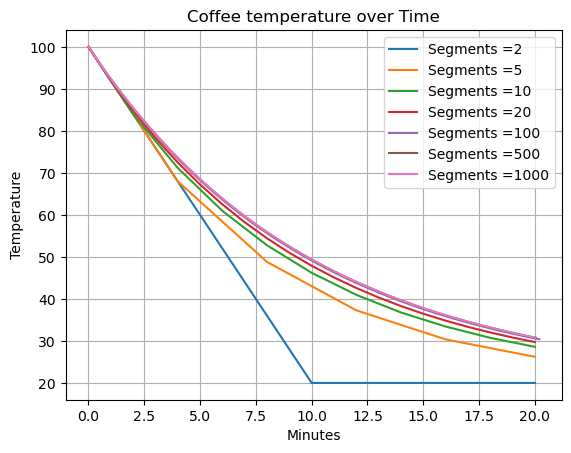

In [17]:
def newtonCooling(k, Q_initial, t_final, steps):   
    
    # time variables
    t_initial = 0
    t = t_initial
    delta_t = (t_final-t_initial)/steps
    # initiate the values
    Q = Q_initial 
    
    #initiate 
    # fermentation_end_alcohol = (0,0)
    # max_yeast = (t, Y)

    # Creating empty arrays to hold values we will plot
    
    Q_graph = [Q]

    t_graph = [t]

    while (t < t_final):

        # Rate of change 
        Qprime = -1*k*(Q-20)
        
        # Actual change in Temperature
       
        delta_Q = Qprime*delta_t

        
        #Updating the values
        t = t + delta_t
        Q = Q + delta_Q
        
      # Add current values to graph vectors
        Q_graph.append(Q)
        t_graph.append(t)


    # return the arrays with values over each step
    return t_graph, Q_graph

k = .1 #natural groath rate of yeast in lbs of yeast per hour, per pound of yeast


Q_initial = 100 #initial drink temperature

S = 1
S_vals = [2, 5, 10, 20, 100, 500, 1000]
for S in S_vals:
    time_values, Q_values = newtonCooling(k, Q_initial, 20, S)
    plt.plot(time_values, Q_values, label='Segments =' + str(S))

plt.xlabel('Minutes')
plt.ylabel('Temperature')
plt.title('Coffee temperature over Time')        
plt.legend()

plt.grid(True)
plt.show()





## 12 c ##

Adjusted coding to for a while loop until the temperature reached 30 degrees, I wasn't sure how to create competing while loops to both change the number of steps so just iterated step size. This question is also a bit tricky because it doesn't say what should stabilize. In this case it's asking how long to cool to 30 degrees so I worked to stabilize the time. 

It took 166 steps to stabilize at 20.75 minutes to cool to 30 degrees, the previous time was 20.75


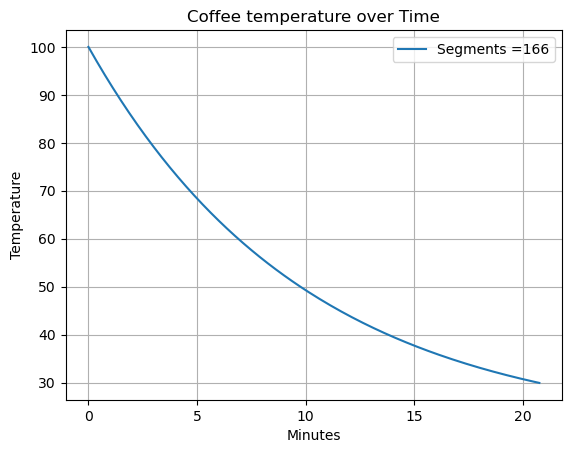

In [18]:
def newtonCooling(k, Q_initial, Q_target, A_initial, delta_t):   
    
    # time variables
    t_initial = 0
    t = t_initial
    num_steps = 0 #counter for number of steps 
    # initiate the values
    Q = Q_initial 
    

    # Creating empty arrays to hold values we will plot
    
    Q_graph = [Q]

    t_graph = [t]

    while (Q >= Q_target):

        # Rate of change 
        Qprime = -1*k*(Q-20)
        
        # Actual change in Temperature
       
        delta_Q = Qprime*delta_t

        
        #Updating the values
        t = t + delta_t
        Q = Q + delta_Q
        
      # Add current values to graph vectors
        Q_graph.append(Q)
        t_graph.append(t)
        num_steps += 1


    # return the arrays with values over each step
    return t_graph, Q_graph, num_steps

k = .1 #temperature change coefficient


Q_initial = 100 #initial drink temperature
Q_target = 30 #target drink temperature
A_initial = 20 #ambient temperature 
delta_t = 1

t_previous = None
tolerance = .01
while True:
    time_values, Q_values, num_steps = newtonCooling(k, Q_initial, Q_target, A_initial, delta_t)
    t_final = time_values[-1]
    
    if t_previous is not None and ((abs(t_final - t_previous) < tolerance)):
        break
        
    t_previous = t_final
    delta_t = delta_t / 2.0 # Decrease delta_t 
 
    


print ("It took " + str(num_steps) + " steps to stabilize at " +str(t_final) + " minutes to cool to 30 degrees, the previous time was " + str(t_previous))
plt.plot(time_values, Q_values, label='Segments =' + str(num_steps))

plt.xlabel('Minutes')
plt.ylabel('Temperature')
plt.title('Coffee temperature over Time')        
plt.legend()

plt.grid(True)
plt.show()

## 13 ##

This step takes a cold drink and has it warm up on a hot day, then points out the temperature at the 5 and 10 minute marks. 

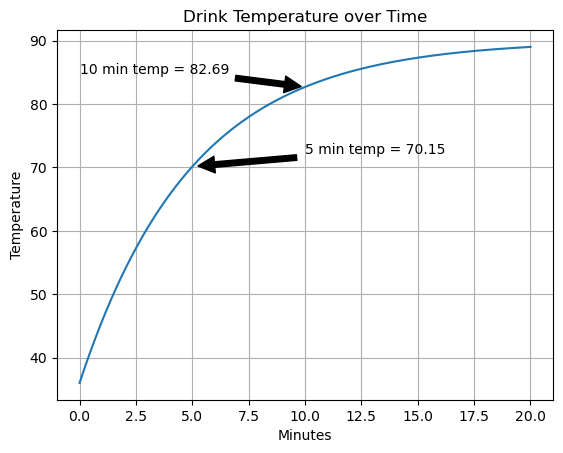

In [19]:
def newtonCooling(k, Q_initial, A_initial, t_final, steps):   
    
    # time variables
    t_initial = 0
    t = t_initial
    delta_t = (t_final-t_initial)/steps
    # initiate the values
    Q = Q_initial 
    
    #initiate 
    five_min = (0,0)
    ten_min = (0,0)

    # Creating empty arrays to hold values we will plot
    
    Q_graph = [Q]

    t_graph = [t]

    while (t < t_final):

        # Rate of change 
        Qprime = -1*k*(Q-A_initial)
        
        # Actual change in Temperature
       
        delta_Q = Qprime*delta_t

        
        #Updating the values
        t = t + delta_t
        Q = Q + delta_Q
        
        if ((t >= 5 and (five_min == (0,0)))):
            five_min = (t,Q) #store time and temp at five minutes 
            
        if ((t >= 10 and (ten_min == (0,0)))):
            ten_min = (t,Q) #store time and temp at five minutes 


        
      # Add current values to graph vectors
        Q_graph.append(Q)
        t_graph.append(t)


    # return the arrays with values over each step
    return t_graph, Q_graph, five_min, ten_min

k = .2 #temperature change coefficient 


Q_initial = 36 #initial drink temperature
A_initial = 90 #ambiet temperature

t_final = 20 #how long to run for
S = 10000 #number of steps

time_values, Q_values, five_min, ten_min = newtonCooling(k, Q_initial, A_initial, t_final, S)
plt.plot(time_values, Q_values)

if five_min != (0, 0):
    plt.annotate('5 min temp = ' + str(round(five_min[1],2)), xy=five_min, xytext=(five_min[0]+5, five_min[1]+2),
                 arrowprops=dict(facecolor='black', shrink=0.05))

if ten_min != (0, 0) :
    plt.annotate('10 min temp = ' + str(round(ten_min[1],2)), xy=ten_min, xytext=(ten_min[0]-10, ten_min[1]+2),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Minutes')
plt.ylabel('Temperature')
plt.title('Drink Temperature over Time')        
# plt.legend()

plt.grid(True)
plt.show()




## 14 a ##

The signs in these differential equations need to be different in order for the two temperatures to move towards the center. In this case, because we already established the drink temperature with negative, the ambient temperature can remain positive assuming k1 and k2 are both positive. 

## 14 b and c ## 

The following answers when the the coffee reaches 40 degrees and the air temperature at that time as well as the final temperature and where it finally stabilizes and when:

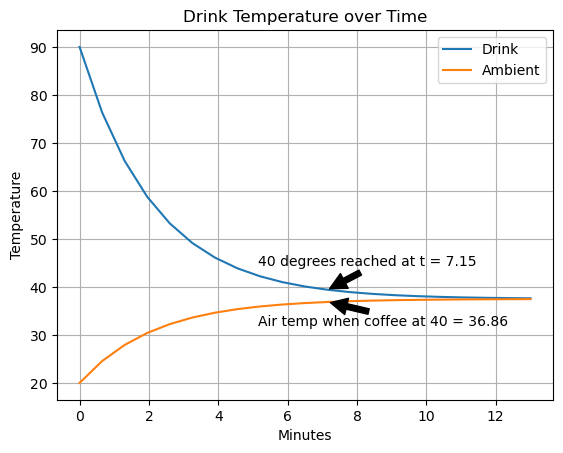

Final Coffee Temp 37.63 degrees at approximately 12 minutes


In [26]:
def newtonCooling(k1, k2, Q_initial, A_initial, t_final, steps):   
    
    # time variables
    t_initial = 0
    t = t_initial
    delta_t = (t_final-t_initial)/steps
    # initiate the values
    Q = Q_initial 
    A = A_initial
    # initiate 40 degree watchdog 
    
    t_40c = (0,0)
    t_40a = (0,0)
    
    # Creating empty arrays to hold values we will plot
    
    Q_graph = [Q]
    A_graph = [A]
    t_graph = [t]

    while (t < t_final):

        # Rate of change 
        Qprime = -1*k1*(Q-A)
        Aprime = k2*(Q-A)
        
        # Actual change in Temperature
       
        delta_Q = Qprime*delta_t
        delta_A = Aprime*delta_t

        
        #Updating the values
        t = t + delta_t
        Q = Q + delta_Q
        A = A + delta_A
        
        #
        if ((Q <= 40 and (t_40c) == (0,0))):
            t_40c = (t,Q) #store time and temp when the coffee is 40 degrees 
            t_40a = (t,A) # store time and air temp
        
      # Add current values to graph vectors
        Q_graph.append(Q)
        A_graph.append(A)
        t_graph.append(t)


    # return the arrays with values over each step
    return t_graph, Q_graph, A_graph, t_40c, t_40a

k1 = .3 #cooling rate of the cup
k2 = .1 #cooling rate of the ambient temperature 

A_initial = 20.0 # Initial ambient temperature
Q_initial = 90.0 #initial drink temperature



#This section iterates to the number of steps to fine the final 
S=10
tolerance = .01 # set value to stabilize to two decimal places 
previous_temperature = None
while True:
    # Calculate the final temperature for the current S
    time_values, Q_values, A_values, t_40c,  t_40a = newtonCooling(k1, k2, Q_initial, A_initial, 20, S)
    
    # Store the current approximation
    Q_final = Q_values[-1]
    A_final = A_values[-1]

    # Check for stabilization
    if previous_temperature is not None and ((abs(Q_final - previous_temperature) < tolerance) and (abs(Q_final - previous_temperature) < tolerance )):
        break
        
    previous_temperature = Q_final
    S = S*2  # Increase the number of steps

    
time_values, Q_values, A_values, t_40c, t_40a = newtonCooling(k1, k2, Q_initial, A_initial, 13, S)
plt.plot(time_values, Q_values, label='Drink')
plt.plot(time_values, A_values, label='Ambient')

if t_40c != (0, 0):
    plt.annotate('40 degrees reached at t = ' + str(round(t_40c[0],2)), xy=t_40c, xytext=(t_40c[0]-2, t_40c[1]+5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
if t_40a != (0, 0):
    plt.annotate('Air temp when coffee at 40 = ' + str(round(t_40a[1],2)), xy=t_40a, xytext=(t_40a[0]-2, t_40a[1]-5),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Minutes')
plt.ylabel('Temperature')
plt.title('Drink Temperature over Time')        
plt.legend()

plt.grid(True)
plt.show()

print ('Final Coffee Temp ' + str(round(Q_values[-1],2)) + ' degrees at approximately 12 minutes')
